In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format='retina'

lists_dict, tps_dict, tns_dict, fps_dict, fns_dict, accs_dict, precs_dict, recs_dict, f1s_dict = dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict()

## Load results of DFDC

In [3]:
dataset = 'dfdc'

with open("runs/binclass/net-SPPNet_traindb-dfdc-35-5-10_face-scale_size-224_seed-41_/validation_preds.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
content = list(filter(lambda a: a != '', content))
lists = [[float(i) for i in l[1:-1].split(", ")] for l in content]
lists_dict[dataset] = lists

FileNotFoundError: [Errno 2] No such file or directory: 'runs/binclass/net-SPPNet_traindb-dfdc-35-5-10_face-scale_size-224_seed-41_/validation_preds.txt'

In [4]:
tps, tns, fps, fns = [], [], [], []
for rnd in range(int(len(lists_dict[dataset])/2)):
    truth = np.array(lists_dict[dataset][2*rnd])
    preds = np.array(lists_dict[dataset][2*rnd+1])
    tps.append(sum(np.where(np.logical_and(truth== 1, preds>0.5), 1, 0)))
    tns.append(sum(np.where(np.logical_and(truth== 0, preds<0.5), 1, 0)))
    fps.append(sum(np.where(np.logical_and(truth== 0, preds>0.5), 1, 0)))
    fns.append(sum(np.where(np.logical_and(truth== 1, preds<0.5), 1, 0)))
tps_dict[dataset] = tps
tns_dict[dataset] = tns
fps_dict[dataset] = fps
fns_dict[dataset] = fns

In [5]:
acc, prec, rec = [], [], []
for tp, tn, fp, fn in zip(tps, tns, fps, fns):
    acc.append((tp+tn)/(tp+tn+fp+fn))
    prec.append((tp)/(tp+fp))
    rec.append((tp)/(tp+fn))
f1=2*(np.array(prec)*np.array(rec))/(np.array(prec)+np.array(rec))
accs_dict[dataset] = acc
precs_dict[dataset] = prec
recs_dict[dataset] = rec
f1s_dict[dataset] = f1

## Load results of FFPP

In [50]:
dataset = 'ffpp'
with open("runs/binclass/net-EfficientNetB4_traindb-ffpp-c23-720-140-140_face-scale_size-224_seed-41_ENB4/last.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
content = list(filter(lambda a: a != '', content))
lists = [[float(i) for i in l[1:-1].split(", ")] for l in content]
lists_dict[dataset] = lists

In [51]:
tps, tns, fps, fns = [], [], [], []
for rnd in range(int(len(lists_dict[dataset])/2)):
    truth = np.array(lists_dict[dataset][2*rnd])
    preds = np.array(lists_dict[dataset][2*rnd+1])
    tps.append(sum(np.where(np.logical_and(truth== 1, preds>0.5), 1, 0)))
    tns.append(sum(np.where(np.logical_and(truth== 0, preds<0.5), 1, 0)))
    fps.append(sum(np.where(np.logical_and(truth== 0, preds>0.5), 1, 0)))
    fns.append(sum(np.where(np.logical_and(truth== 1, preds<0.5), 1, 0)))
tps_dict[dataset] = tps
tns_dict[dataset] = tns
fps_dict[dataset] = fps
fns_dict[dataset] = fns

In [52]:
acc, prec, rec = [], [], []
for tp, tn, fp, fn in zip(tps, tns, fps, fns):
    acc.append((tp+tn)/(tp+tn+fp+fn))
    prec.append((tp)/(tp+fp))
    rec.append((tp)/(tp+fn))
f1=2*(np.array(prec)*np.array(rec))/(np.array(prec)+np.array(rec))
accs_dict[dataset] = acc
precs_dict[dataset] = prec
recs_dict[dataset] = rec
f1s_dict[dataset] = f1

## Load results of CELEBDF

In [9]:
dataset = 'celebdf'

with open("runs/binclass/net-EfficientNetB4_traindb-celebdf_face-scale_size-224_seed-41_ENB4/last.txt") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
content = list(filter(lambda a: a != '', content))
lists = [[float(i) for i in l[1:-1].split(", ")] for l in content]
lists_dict[dataset] = lists

In [10]:
tps, tns, fps, fns = [], [], [], []
for rnd in range(int(len(lists_dict[dataset])/2)):
    truth = np.array(lists_dict[dataset][2*rnd])
    preds = np.array(lists_dict[dataset][2*rnd+1])
    tps.append(sum(np.where(np.logical_and(truth== 1, preds>0.5), 1, 0)))
    tns.append(sum(np.where(np.logical_and(truth== 0, preds<0.5), 1, 0)))
    fps.append(sum(np.where(np.logical_and(truth== 0, preds>0.5), 1, 0)))
    fns.append(sum(np.where(np.logical_and(truth== 1, preds<0.5), 1, 0)))
tps_dict[dataset] = tps
tns_dict[dataset] = tns
fps_dict[dataset] = fps
fns_dict[dataset] = fns

In [11]:
acc, prec, rec = [], [], []
for tp, tn, fp, fn in zip(tps, tns, fps, fns):
    acc.append((tp+tn)/(tp+tn+fp+fn))
    prec.append((tp)/(tp+fp))
    rec.append((tp)/(tp+fn))
f1=2*(np.array(prec)*np.array(rec))/(np.array(prec)+np.array(rec))
accs_dict[dataset] = acc
precs_dict[dataset] = prec
recs_dict[dataset] = rec
f1s_dict[dataset] = f1

 ## Plots of accuracy, precision recall and F1-score

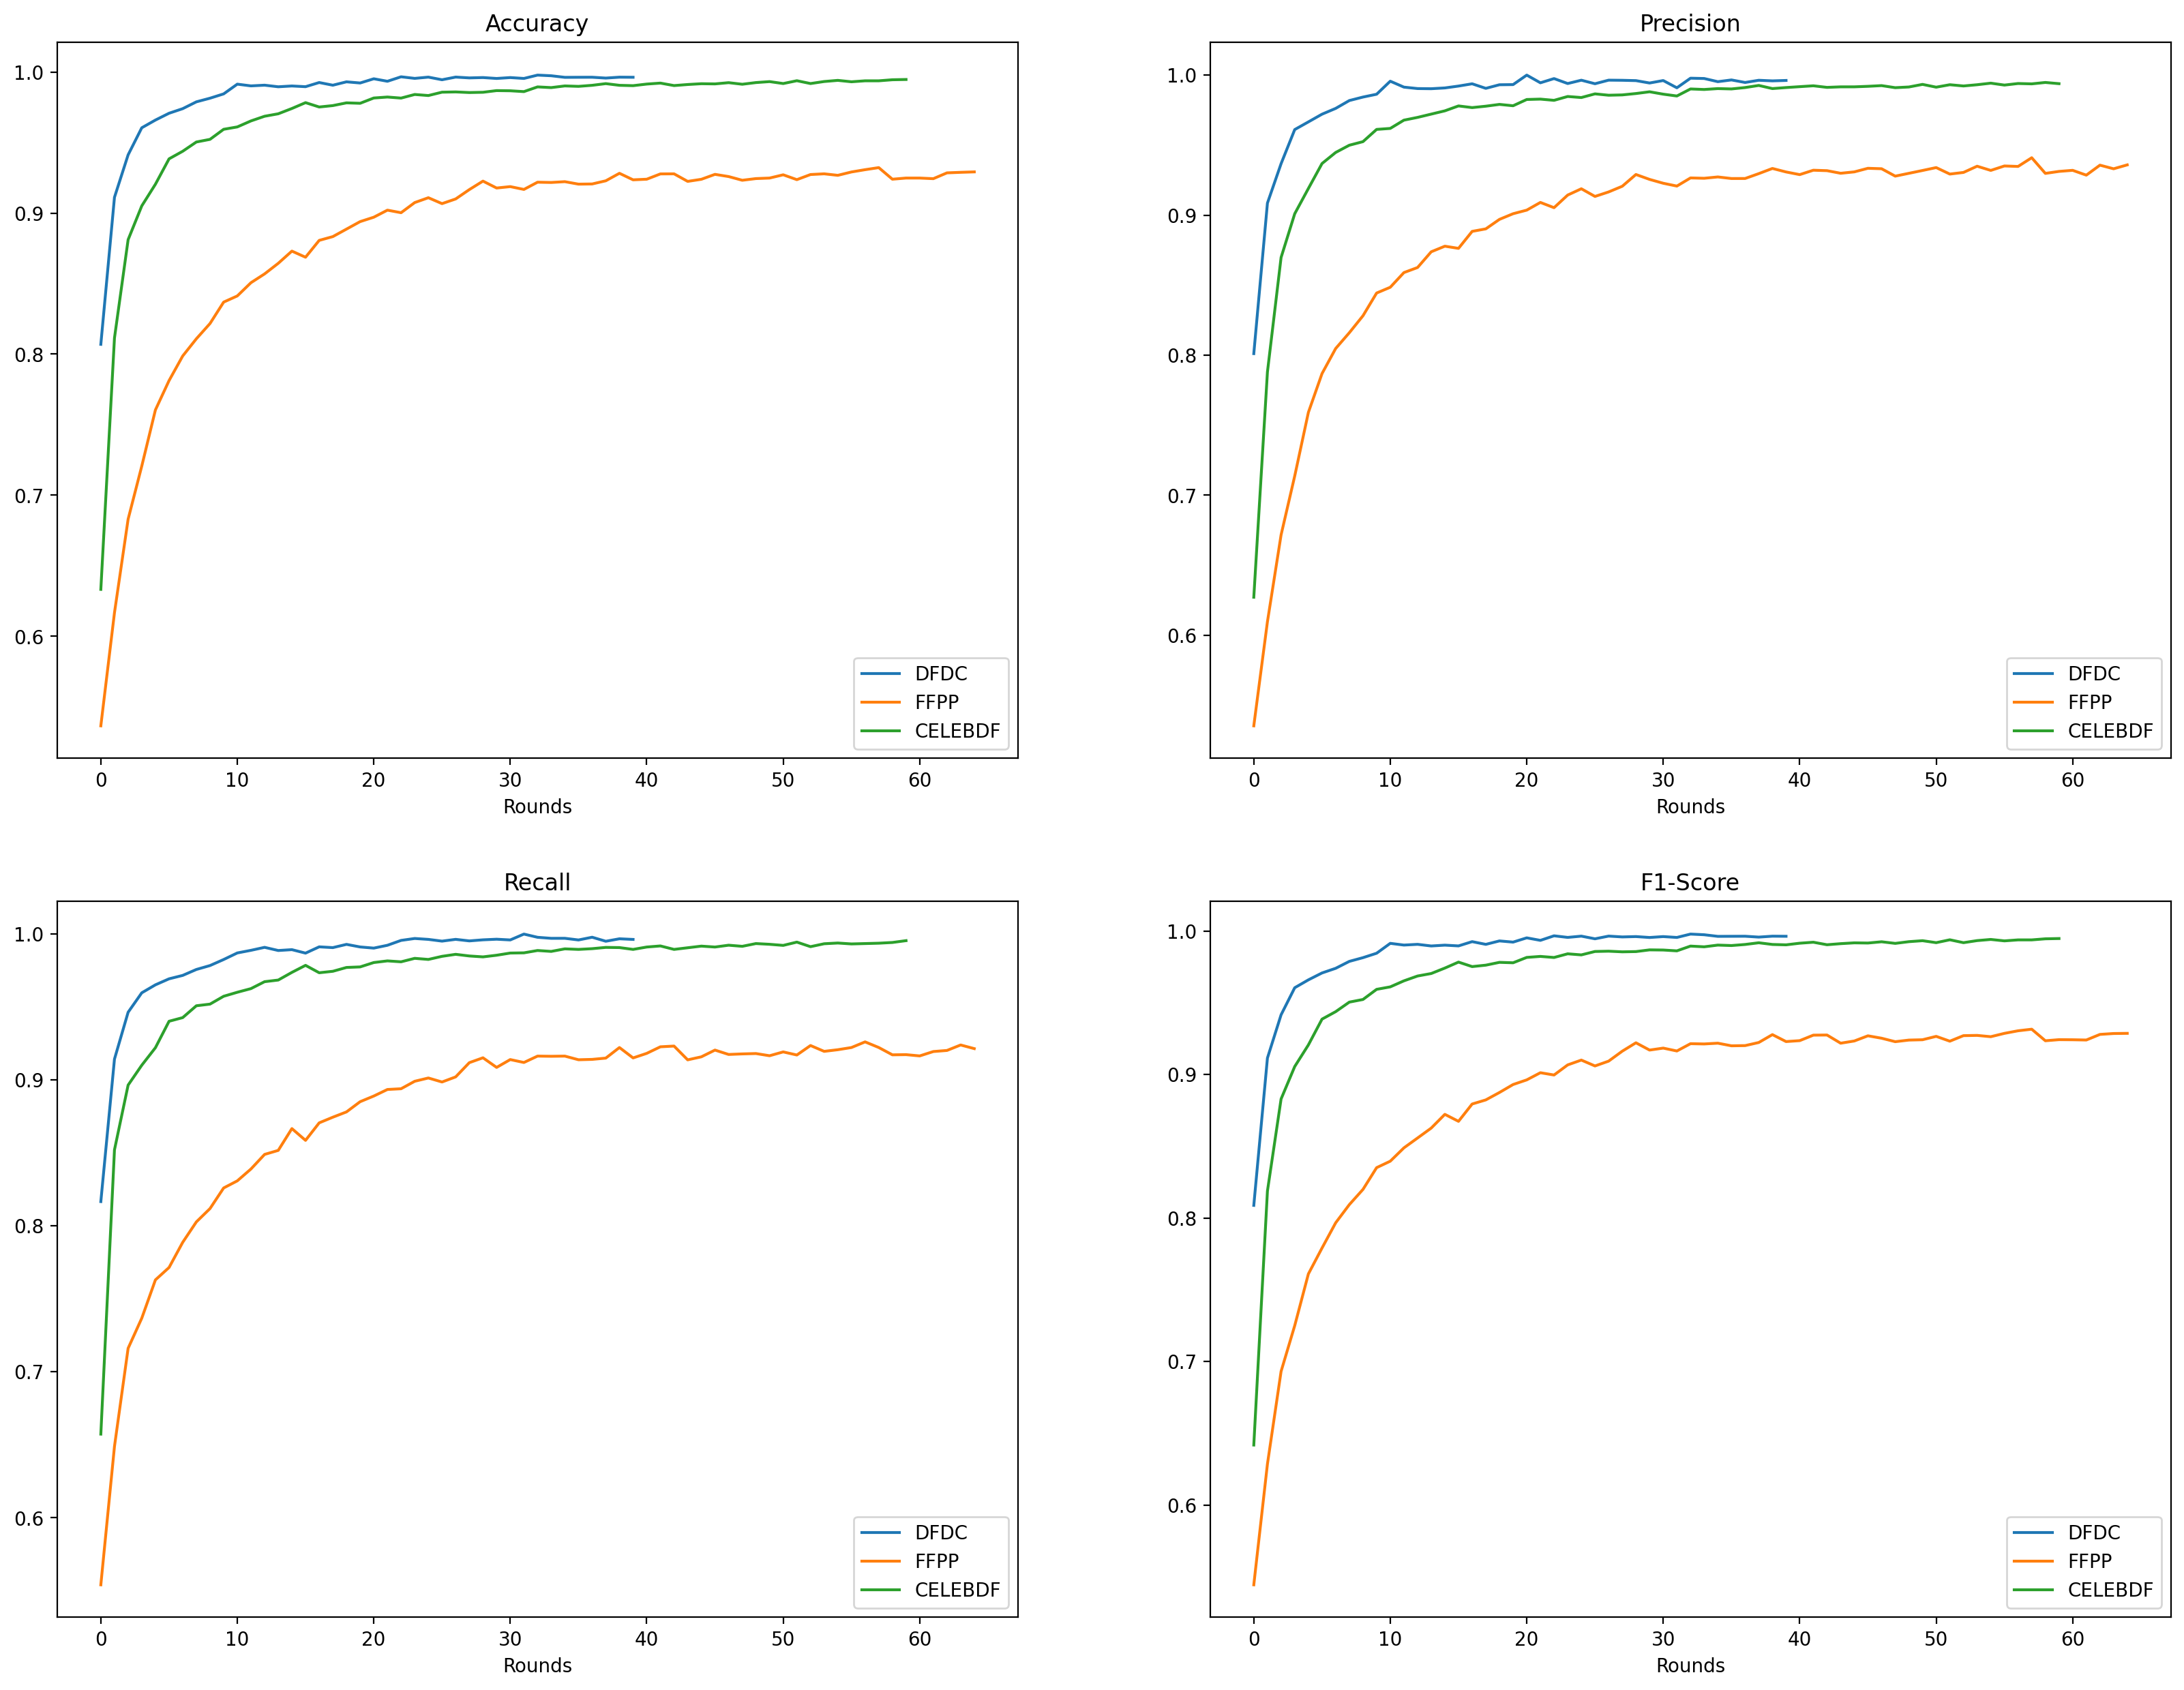

In [53]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig = plt.figure(figsize=(20, 15))

for i, title, dico in zip(np.arange(4)+1,
                    ['Accuracy', 'Precision', 'Recall', 'F1-Score'], 
                    [accs_dict, precs_dict, recs_dict, f1s_dict] ):
    plt.subplot(2, 2, i)
    for ds in ['dfdc', 'ffpp', 'celebdf']:
        plt.plot(np.arange(len(dico[ds])), dico[ds], label=ds.upper())
    plt.title(title)
    plt.xlabel("Rounds")
    plt.legend()

plt.show()

## ROC curves

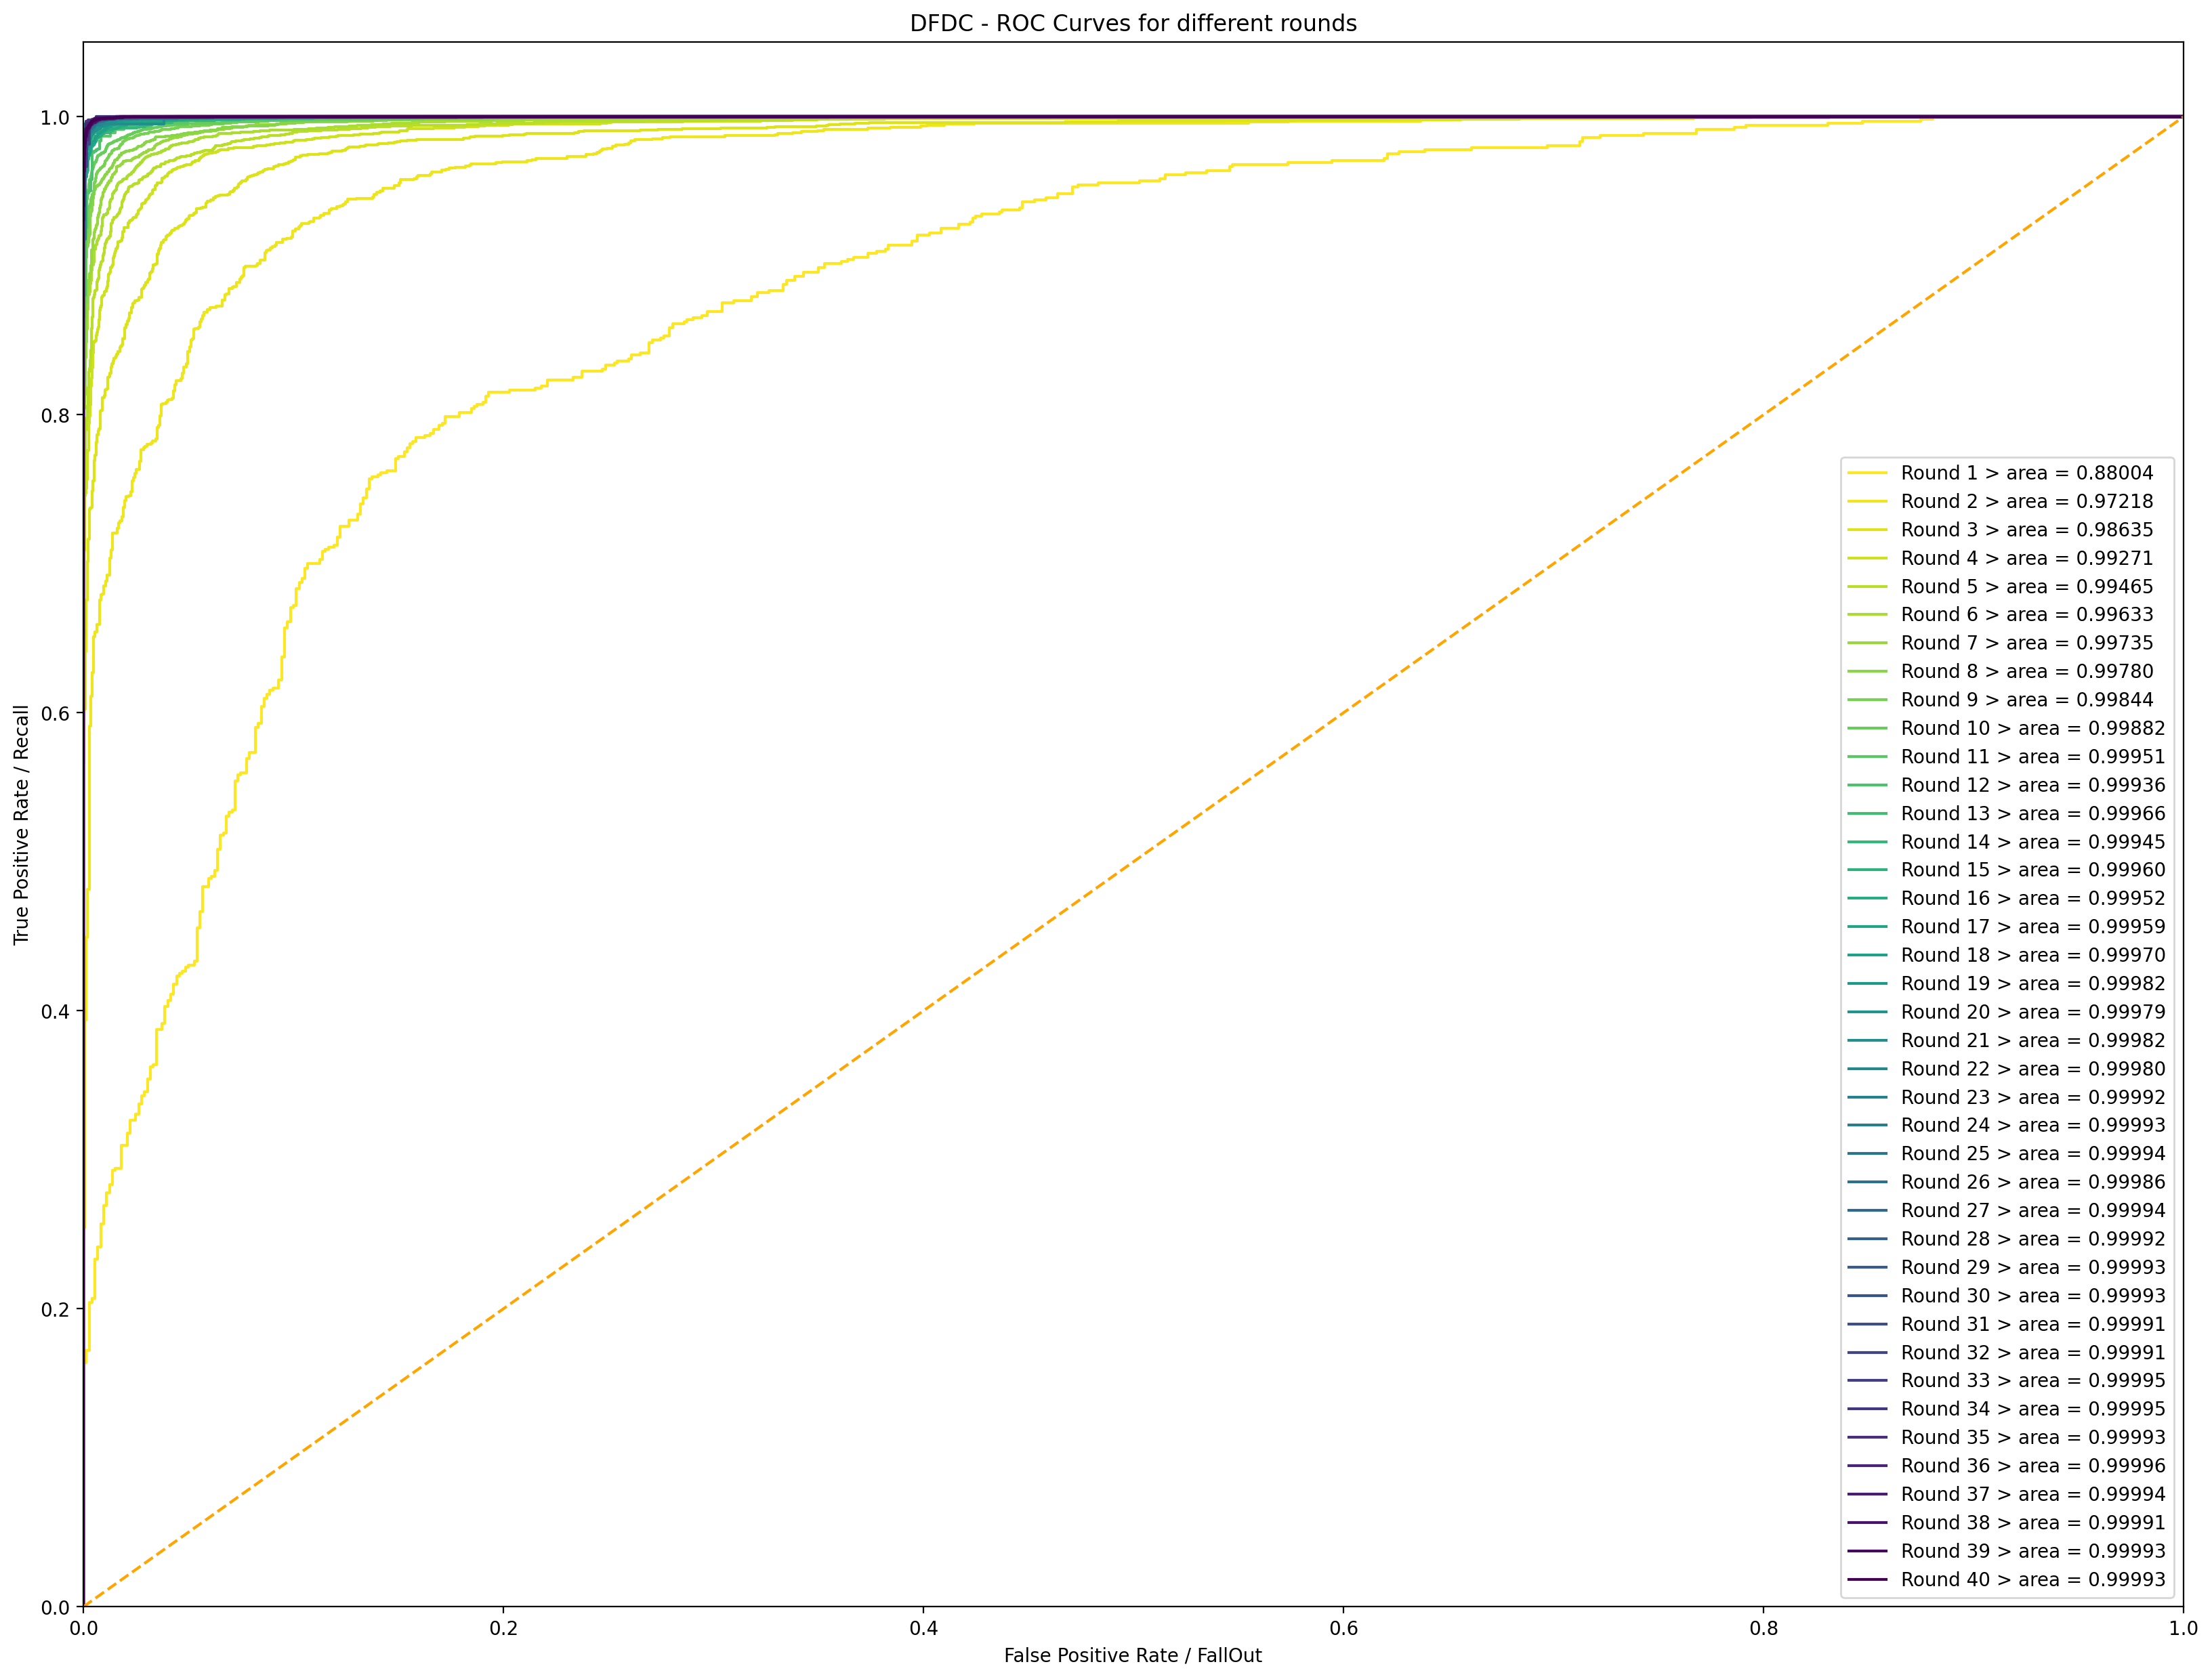

In [54]:
ds = 'dfdc'

fpr = dict()
tpr = dict()
roc_auc = dict()
for rnd in range(int(len(lists_dict[ds])/2)):    
    fpr[rnd], tpr[rnd], _ = roc_curve(lists_dict[ds][2*rnd], lists_dict[ds][2*rnd+1])
    roc_auc[rnd] = auc(fpr[rnd], tpr[rnd])
    
plt.figure(figsize=(20, 15))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis_r(np.linspace(0,1,len(fpr))))

for rnd in range(len(fpr)):
    plt.plot(fpr[rnd], tpr[rnd], label='Round '+str(rnd+1)+' > area = %0.5f' % roc_auc[rnd])

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / FallOut')
plt.ylabel('True Positive Rate / Recall')
plt.title(ds.upper()+' - ROC Curves for different rounds')
plt.legend(loc="lower right")
plt.show()

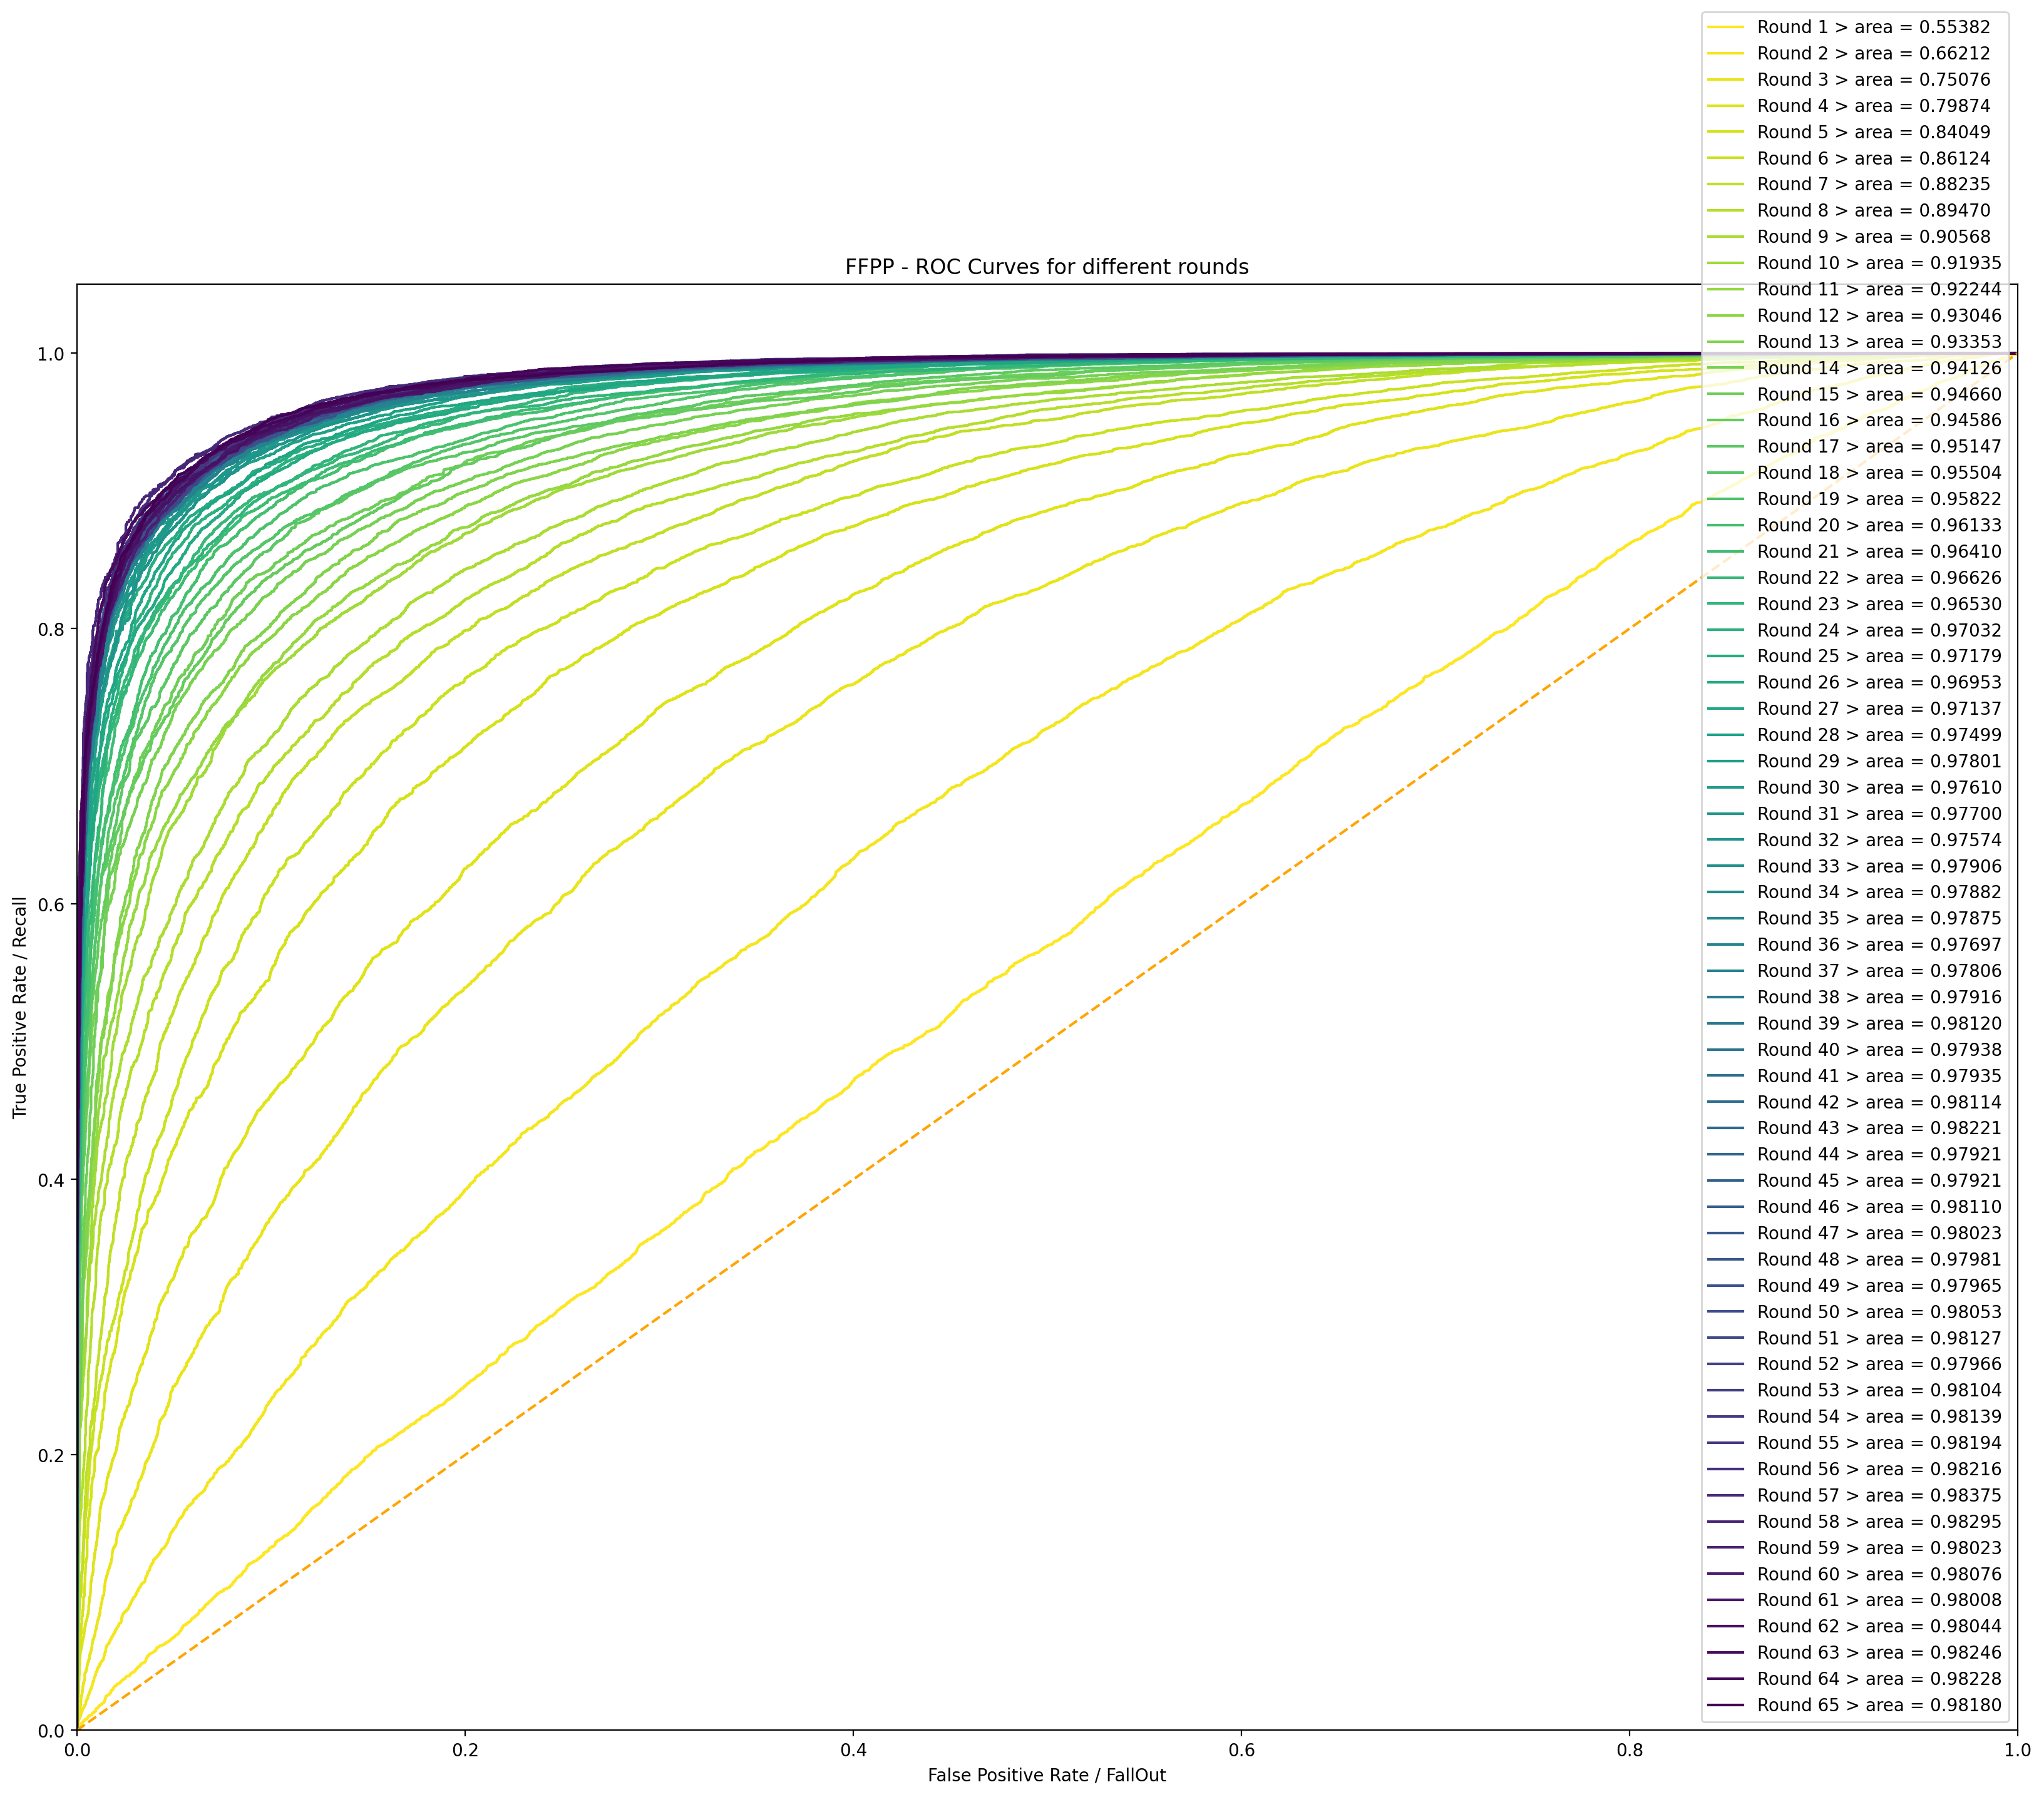

In [55]:
ds = 'ffpp'

fpr = dict()
tpr = dict()
roc_auc = dict()
for rnd in range(int(len(lists_dict[ds])/2)):    
    fpr[rnd], tpr[rnd], _ = roc_curve(lists_dict[ds][2*rnd], lists_dict[ds][2*rnd+1])
    roc_auc[rnd] = auc(fpr[rnd], tpr[rnd])
    
plt.figure(figsize=(20, 15))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis_r(np.linspace(0,1,len(fpr))))

for rnd in range(len(fpr)):
    plt.plot(fpr[rnd], tpr[rnd], label='Round '+str(rnd+1)+' > area = %0.5f' % roc_auc[rnd])

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / FallOut')
plt.ylabel('True Positive Rate / Recall')
plt.title(ds.upper()+' - ROC Curves for different rounds')
plt.legend(loc="lower right")
plt.show()

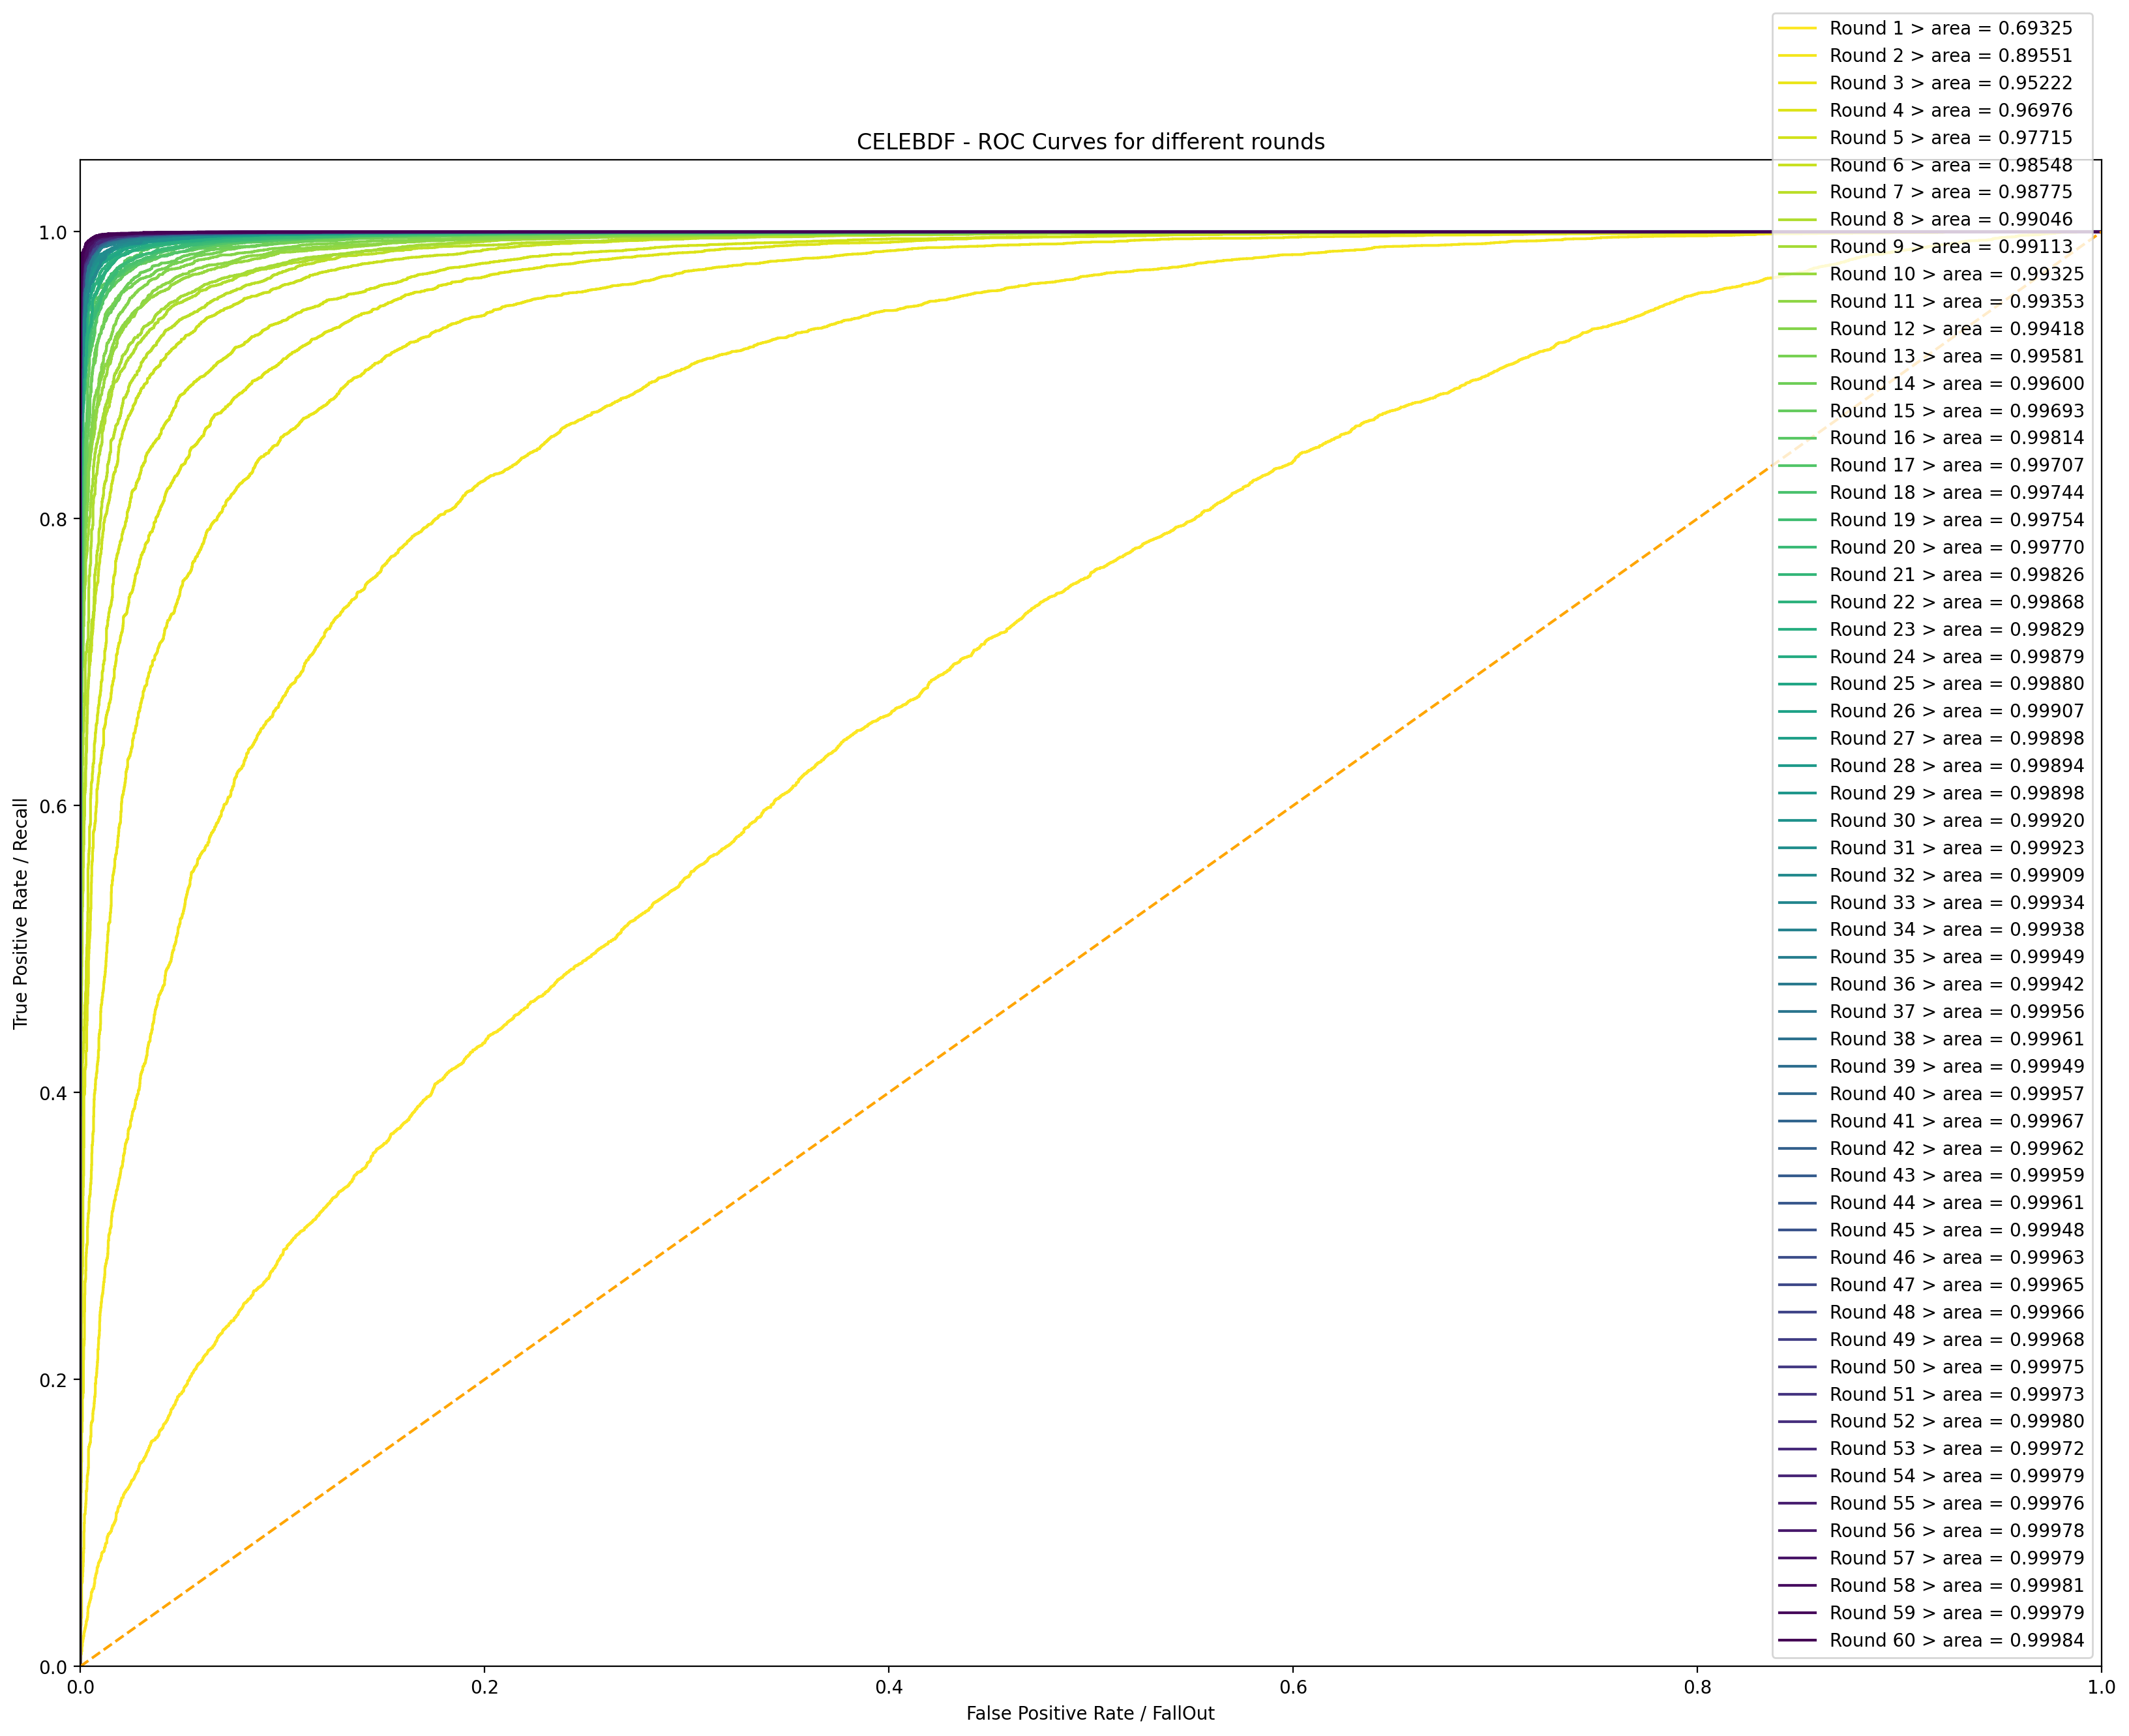

In [56]:
ds = 'celebdf'

fpr = dict()
tpr = dict()
roc_auc = dict()
for rnd in range(int(len(lists_dict[ds])/2)):    
    fpr[rnd], tpr[rnd], _ = roc_curve(lists_dict[ds][2*rnd], lists_dict[ds][2*rnd+1])
    roc_auc[rnd] = auc(fpr[rnd], tpr[rnd])
    
plt.figure(figsize=(20, 15))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis_r(np.linspace(0,1,len(fpr))))

for rnd in range(len(fpr)):
    plt.plot(fpr[rnd], tpr[rnd], label='Round '+str(rnd+1)+' > area = %0.5f' % roc_auc[rnd])

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / FallOut')
plt.ylabel('True Positive Rate / Recall')
plt.title(ds.upper()+' - ROC Curves for different rounds')
plt.legend(loc="lower right")
plt.show()

In [60]:
lists_dict['dfdc'][39]

[0.9995459914207458,
 0.00011519022518768907,
 0.9987186193466187,
 0.000183266238309443,
 0.9954671859741211,
 0.0008112538489513099,
 0.9998630285263062,
 0.0005422611720860004,
 0.9998898506164551,
 0.0026276519056409597,
 0.9999210834503174,
 1.3509127711586189e-05,
 0.9943403005599976,
 0.00013813312398269773,
 0.9998390674591064,
 0.015263127163052559,
 0.9994889497756958,
 6.573707651114091e-05,
 0.9999809265136719,
 0.0004043845401611179,
 0.9989252686500549,
 0.00016839918680489063,
 0.9997257590293884,
 0.0003350813640281558,
 0.9997321963310242,
 5.330760177457705e-05,
 0.9997492432594299,
 0.000238094522501342,
 0.9999562501907349,
 0.00017412625311408192,
 0.9987049102783203,
 0.0008485039579682052,
 0.9995205402374268,
 0.004352960269898176,
 0.9999626874923706,
 0.0009561289334669709,
 0.9998558759689331,
 1.7044761989382096e-05,
 0.9997612833976746,
 0.0009851763024926186,
 0.9999082088470459,
 0.0006051242235116661,
 0.9998743534088135,
 0.0001924842654261738,
 0.87939